In [1]:
#conda install nltk
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
      Unzipping corpora/stopwords.zip.

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [2]:
messages = [line.rstrip() for line in open('/content/SMSSpamCollection')]

In [3]:
print(len(messages))

5574


In [4]:
#corpus

In [5]:
for message_no, message in enumerate(messages[:10]):
  print(message_no, message)
  print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [6]:
import pandas as pd

In [7]:
messages = pd.read_csv('SMSSpamCollection', sep= '\t', names= ['label', 'message'])

In [8]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#EDA

In [10]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [11]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [12]:
#pre processing step

In [13]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
#dat visualization

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

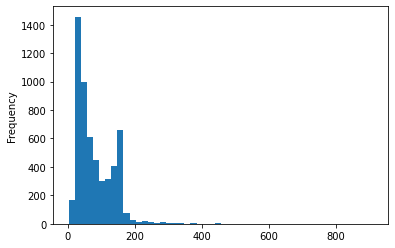

In [16]:
messages['length'].plot(kind = 'hist', bins = 50)

In [17]:
messages.length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [18]:
messages[messages['length']==910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fb3a2d4ab50>,
      dtype=object)

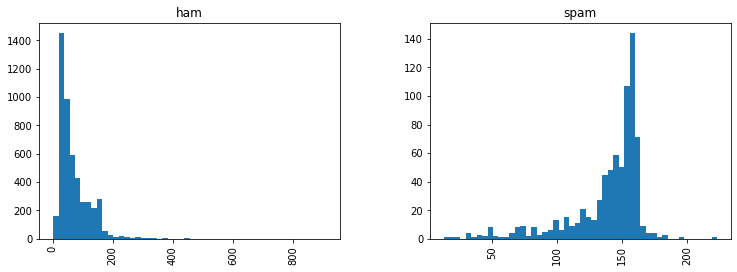

In [19]:
messages.hist(column = 'length', by='label', bins= 50 , figsize= (12,4))

In [20]:
#text pre proccessing

In [21]:
#bag of words(conver text features in vector format)

In [22]:
#sequence of character => sep of number

In [23]:
import string
mess = 'sample message! Notice: it is punctuation'

In [24]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
nopunc = [char for char in mess if char not in string.punctuation ]

In [26]:
nopunc

['s',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'i',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [27]:
nopunc = ''.join(nopunc)

In [28]:
nopunc

'sample message Notice it is punctuation'

In [29]:
from nltk.corpus import stopwords
stopwords.words('english')[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [30]:
nopunc.split()

['sample', 'message', 'Notice', 'it', 'is', 'punctuation']

In [31]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [32]:
clean_mess

['sample', 'message', 'Notice', 'punctuation']

In [33]:
def text_process(mess):
  nopunc = [char for char in mess if char not in string.punctuation ]
  nopunc = ''.join(nopunc)

  return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [34]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [35]:
#tokenization = used to describe the process of converting the normal text into list of tokens

In [36]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [37]:
#stamming and distinguish by part of speech

In [38]:
#vectorization = lemas

In [58]:
#bag of words
'''1) count how many times word occur in messages(TF- term frequency)
2) weight the count so that frequent tokens get low weight (IDF - inverse document frq)
3)Normalize the vector to unit length to abstract from original text''' 

'1) count how many times word occur in messages(TF- term frequency)\n2) weight the count so that frequent tokens get low weight (IDF - inverse document frq)\n3)Normalize the vector to unit length to abstract from original text'

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [42]:
print(len(bow_transformer.vocabulary_))

11425


In [43]:
message4 = messages['message'][3]
print(message4)

U dun say so early hor... U c already then say...


In [44]:
bow4 = bow_transformer.transform([message4])
print(bow4)
print(bow4.shape)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [45]:
print(bow_transformer.get_feature_names()[9554])

say


In [46]:
messages_bow = bow_transformer.transform(messages['message'])

In [47]:
print('shape of sparse metrix', messages_bow.shape)
print('amouunt of non zero accurences ', messages_bow.nnz)

shape of aparse metrix (5572, 11425)
amouunt of non zero accurences  50548


In [48]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(sparsity))

sparsity: 0.07940295412668218


In [50]:
from sklearn.feature_extraction.text import TfidfTransformer
tfid_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfid_transformer.transform(bow4)
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [53]:
tfid_transformer.idf_[bow_transformer.vocabulary_['u']]
tfid_transformer.idf_[bow_transformer.vocabulary_['say']]

5.231239632897098

In [ ]:
#for full messages bow

In [54]:
messages_tfidf = tfid_transformer.transform(messages_bow)

In [57]:
print(messages_tfidf.shape)

(5572, 11425)


In [59]:
#training a model

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [70]:
#62 to 69 is just fo rinformation this is mot actual model 
#wrong way

In [62]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [65]:
print('prediction',spam_detect_model.predict(tfidf4)[0])
print('expectes', messages.label[0])

prediction ham
expectes ham


In [67]:
all_predictions = spam_detect_model.predict(messages_tfidf)

In [68]:
from sklearn.metrics import classification_report,confusion_matrix

In [69]:
print(classification_report(messages['label'],all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [71]:
#original way

In [72]:
from sklearn.model_selection import train_test_split

In [74]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'], messages['label'], test_size = 0.2, random_state =101)

In [76]:
print(len(msg_train),len(msg_test), len(label_train))

4457 1115 4457


In [77]:
from sklearn.pipeline import  Pipeline

In [80]:
pipeline = Pipeline([
                     ('bow', CountVectorizer(analyzer= text_process)),
                     ('tfidf', TfidfTransformer()),
                     ('classifier', MultinomialNB())
])

In [81]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fb3a2b7d7a0>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [82]:
predictions = pipeline.predict(msg_test)

In [83]:
print(classification_report(label_test,predictions))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       980
        spam       1.00      0.66      0.79       135

    accuracy                           0.96      1115
   macro avg       0.98      0.83      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [85]:
confusion_matrix(label_test, predictions)

array([[980,   0],
       [ 46,  89]])

In [90]:
#checking in extra msg

In [97]:
msg = 'Offers! 50% off in your order'
msg_series = pd.Series(msg)

In [98]:
pipeline.predict(msg_series)

array(['ham'], dtype='<U4')